<a href="https://colab.research.google.com/github/tushar821999/Pandas_Library/blob/master/Cloud_SLA_Voilation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DataSet Used***

Active Link : [cloud_server_dataset](https://github.com/tushar821999/Pandas_Library/blob/master/Data%20Set/cloud_server.csv) 

In [9]:
import pandas as pd
df = pd.read_csv('/content/cloud_server.csv')
print(df)

         Date_Stamp Time_Stamp Server_Alpha_Status  Server_Numerical_Status
0        12/13/2019    1:10:14           server up                      1.0
1        12/13/2019    1:10:14           server up                      1.0
2        12/13/2019    1:10:15           server up                      1.0
3        12/13/2019    1:10:15           server up                      1.0
4        12/13/2019    1:10:16           server up                      1.0
...             ...        ...                 ...                      ...
1048570         NaN        NaN                 NaN                      NaN
1048571         NaN        NaN                 NaN                      NaN
1048572         NaN        NaN                 NaN                      NaN
1048573         NaN        NaN                 NaN                      NaN
1048574         NaN        NaN                 NaN                      1.0

[1048575 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
import matplotlib.pyplot as plt
server_status = df.groupby('Server_Alpha_Status')['Server_Numerical_Status'].count()
print(server_status)

Server_Alpha_Status
server down    207
server up      526
Name: Server_Numerical_Status, dtype: int64


In [3]:
server_status_unique = list(df.Server_Alpha_Status.unique())
server_status = server_status.reindex(server_status_unique,axis=0)
print(server_status)

Server_Alpha_Status
server up      526.0
server down    207.0
NaN              NaN
Name: Server_Numerical_Status, dtype: float64


In [10]:
server_status = server_status.to_frame()
print(server_status.head(12))
server_status.reset_index(level=0,inplace=True)

                     Server_Numerical_Status
Server_Alpha_Status                         
server down                              207
server up                                526


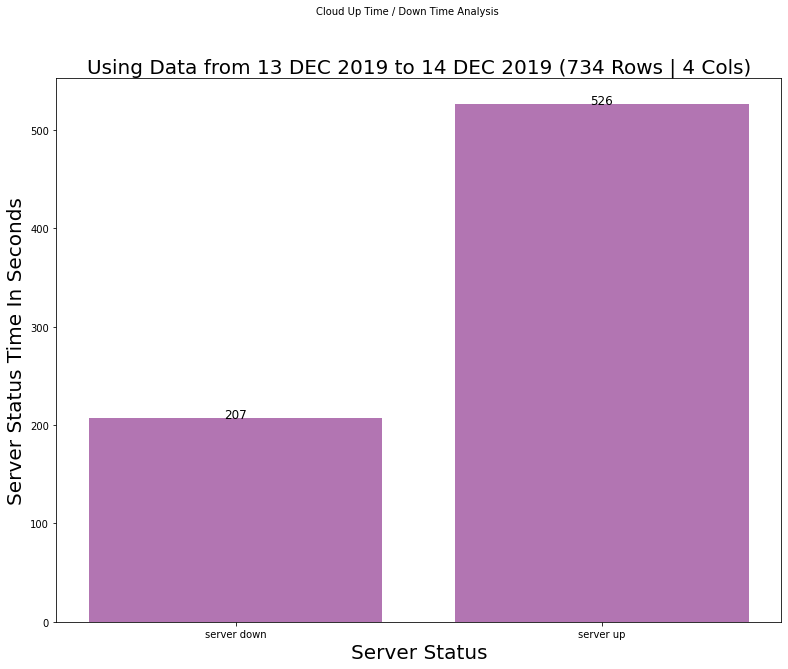

In [11]:
plt.figure(figsize=(13,10))
plt.bar(server_status['Server_Alpha_Status'],server_status['Server_Numerical_Status'],color=(0.5,0.1,0.5,0.6))
plt.suptitle('Cloud Up Time / Down Time Analysis',fontsize=10)
plt.title('Using Data from 13 DEC 2019 to 14 DEC 2019 (734 Rows | 4 Cols)',fontsize=20)
plt.xlabel('Server Status',fontsize=20)
plt.ylabel('Server Status Time In Seconds',fontsize=20)

for i,num in enumerate(server_status['Server_Numerical_Status']):
  plt.text(i,num,num,ha='center',fontsize=12)